# EDA

за основу взял [1 занятие клуба ии в мифи](https://colab.research.google.com/drive/1V__EuSANRpZLZd5dW2H9Pgvxhllfud1x)

### Загрузим файлы, с которыми будем работать

In [57]:
import pandas as pd
train = pd.read_csv("train.csv")
commit = pd.read_csv("test.csv")

### Выделим категориальные признаки, численные и целевой признак

In [58]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

churn = "Churn"

### Проанализируем данные на пустые и некорректные значения

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [60]:
commit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              1761 non-null   int64  
 1   MonthlySpending           1761 non-null   float64
 2   TotalSpent                1761 non-null   object 
 3   Sex                       1761 non-null   object 
 4   IsSeniorCitizen           1761 non-null   int64  
 5   HasPartner                1761 non-null   object 
 6   HasChild                  1761 non-null   object 
 7   HasPhoneService           1761 non-null   object 
 8   HasMultiplePhoneNumbers   1761 non-null   object 
 9   HasInternetService        1761 non-null   object 
 10  HasOnlineSecurityService  1761 non-null   object 
 11  HasOnlineBackup           1761 non-null   object 
 12  HasDeviceProtection       1761 non-null   object 
 13  HasTechSupportAccess      1761 non-null   object 
 14  HasOnlin

Заметим, что TotalSpent представлен как object, а IsSeniorCitizen как int. Сделаем замену типов

Заменим все " " на пустые значения

In [61]:
import numpy as np

train.replace(' ', np.nan, inplace=True)
commit.replace(' ', np.nan, inplace=True)

<Axes: >

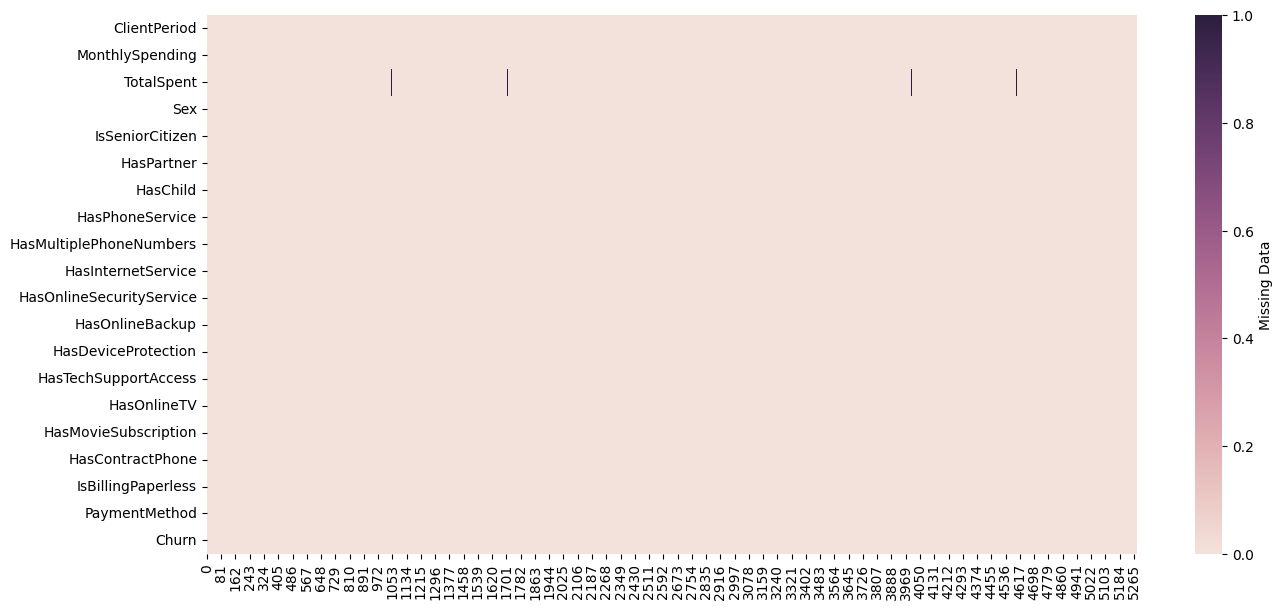

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# График распределения пропущенных значений
plt.figure(figsize=(15,7))

cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(train.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

In [63]:
print(train.isna().sum())
print(commit.isna().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
ClientPeriod                0
MonthlySpending             0
TotalSpent                  2
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection        


Как мы видим, пустые значения появились в totalspent. Заменим их на нули

In [64]:
train["TotalSpent"] = train["TotalSpent"].replace(np.nan, 0).astype('float')
commit["TotalSpent"] = commit["TotalSpent"].replace(np.nan, 0).astype('float')

In [65]:
print(train.info())
print(commit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Заменим для IsSeniorCitizen 0 на No, 1 на Yes

In [66]:
train.IsSeniorCitizen = train.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
commit.IsSeniorCitizen = commit.IsSeniorCitizen.map(lambda x: "Yes" if x == 1 else "No")
print(set(train.IsSeniorCitizen.to_list()))
print(set(commit.IsSeniorCitizen.to_list()))

{'No', 'Yes'}
{'No', 'Yes'}


### Анализ числовых признаков

Распределение признаков

In [67]:
train.describe()

,ClientPeriod,MonthlySpending,TotalSpent,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.486161,0.262022
std,24.550326,30.176464,2269.049195,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000
75%,55.000000,90.050000,3795.212500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [68]:
commit.describe()

,ClientPeriod,MonthlySpending,TotalSpent
count,1761.000000,1761.000000,1761.000000
mean,32.293583,64.272601,2256.483135
std,24.593736,29.832517,2260.501794
min,0.000000,18.550000,0.000000
25%,9.000000,35.650000,405.600000
50%,29.000000,70.050000,1356.300000
75%,56.000000,89.400000,3759.050000
max,72.000000,117.350000,8496.700000


array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

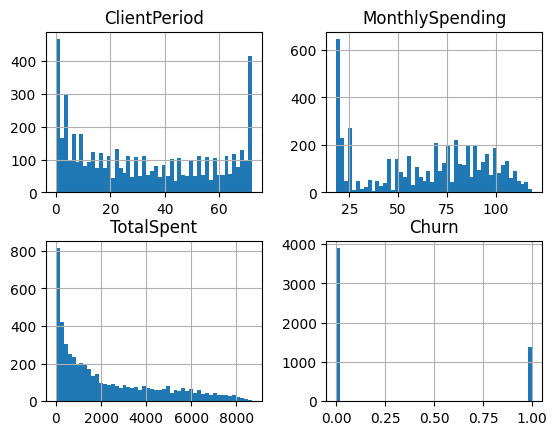

In [69]:
train.hist(bins=50)

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>, <Axes: >]], dtype=object)

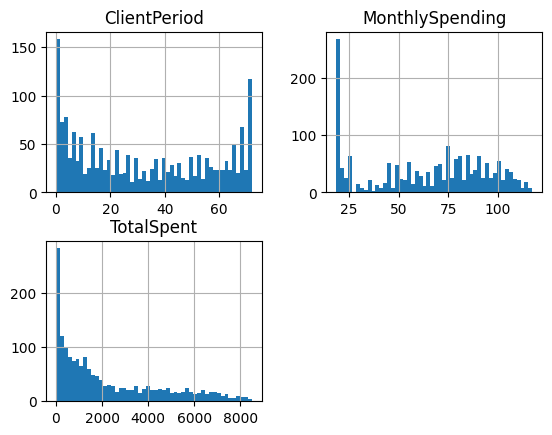

In [70]:
commit.hist(bins=50)

Гистограммы схожи, значит данные провдоподобные и сформированны не предвзято

Попробуем обнаружить взаимосвзязь между численными признаками

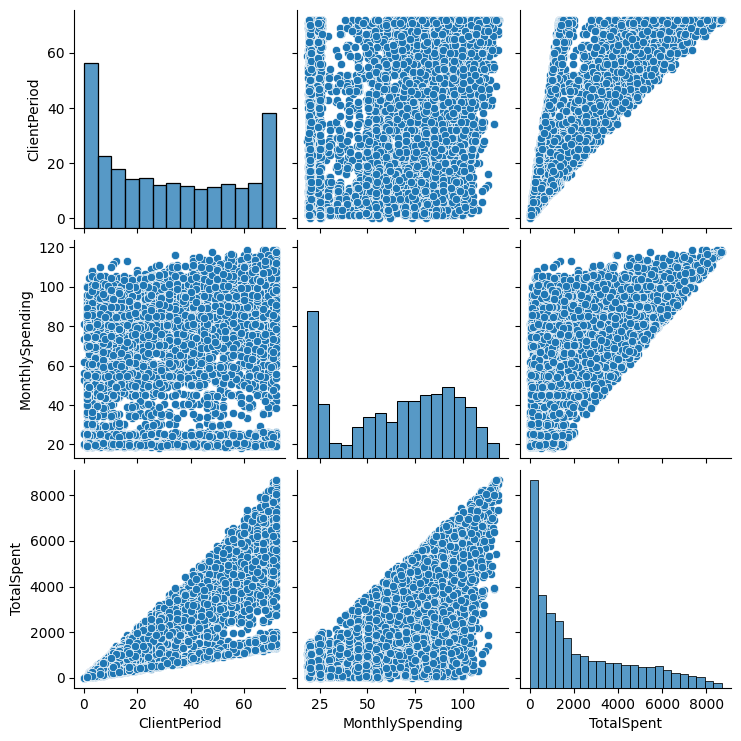

In [71]:
sns.pairplot(train[num_cols])

### Анализ категориальных признаков

Рассмотрим распределение целевой переменной по всем категориальным признакам

C:\Users\bm535\AppData\Local\Temp\ipykernel_34788\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_34788\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_34788\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)
C:\Users\bm535\AppData\Local\Temp\ipykernel_34788\2666340111.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


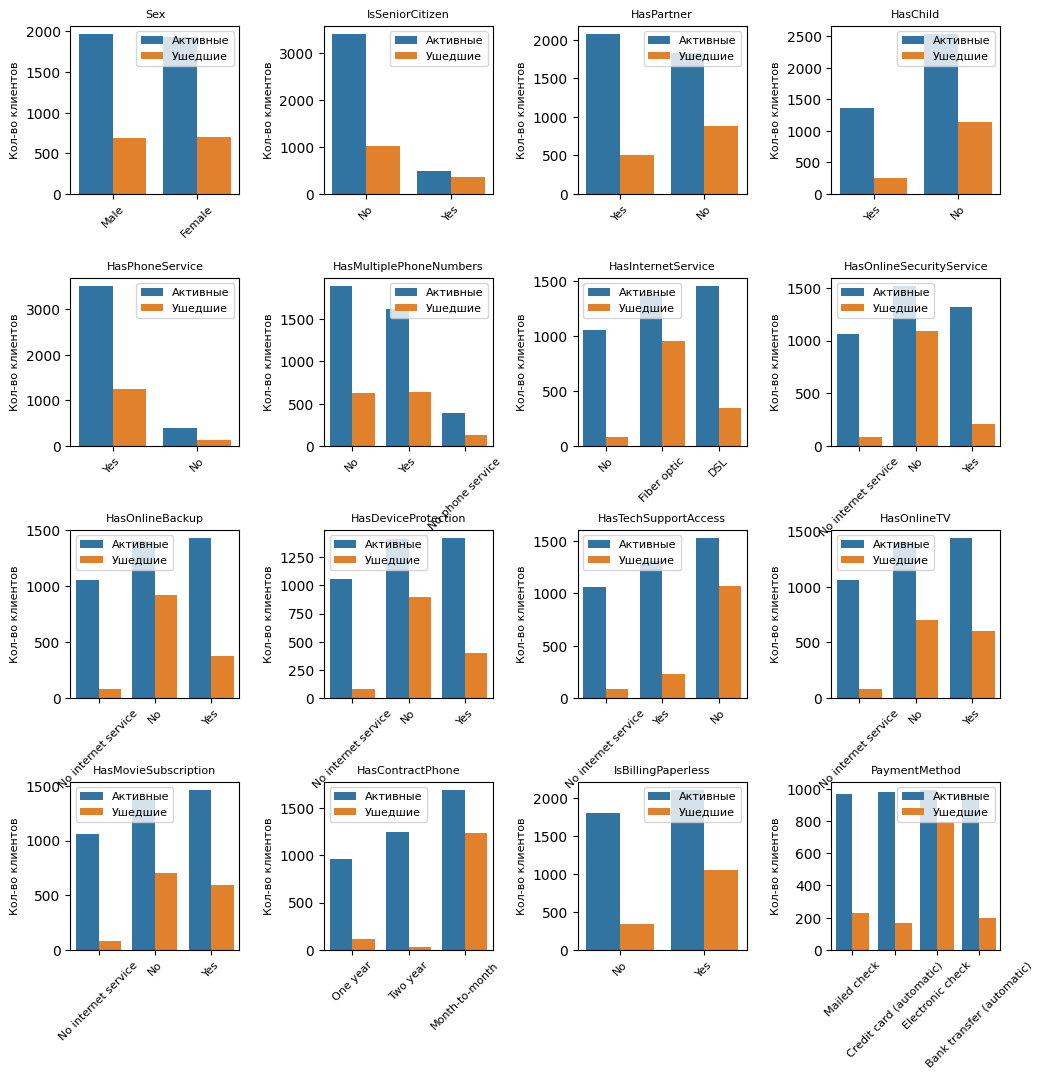

In [72]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,  figsize=(12, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i, column_name in enumerate(cat_cols):
    row = i // nrows
    col = i % ncols
    axis = axes[row, col]
    chart_title = "".join(column_name)
    sns.countplot(train, x=column_name, hue=churn, ax=axis)
    axis.set_title(chart_title, fontsize=8)
    axis.set_xlabel("")
    axis.set_ylabel("Кол-во клиентов", fontsize=8)
    axis.legend(("Активные", "Ушедшие"), fontsize=8)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, fontsize=8)


Для обнаружения корреляций между признаками закодируем категориальные признаки методом labelencoding(чтобы за раз закодировать ordinalencoder)

In [73]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
train_label_encoded = train.copy()
train_label_encoded[cat_cols] = oe.fit_transform(train_label_encoded[cat_cols])

train_label_encoded

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0
1,72,25.85,1872.20,1.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,0
2,1,75.90,75.90,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,1
3,32,79.30,2570.00,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0
4,60,115.25,6758.45,0.0,0.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0
5278,50,44.45,2188.45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,0.0,0
5279,1,55.05,55.05,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,3.0,0
5280,29,76.00,2215.25,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0


Построим хитмап для обнаружения корреляций

<Axes: >

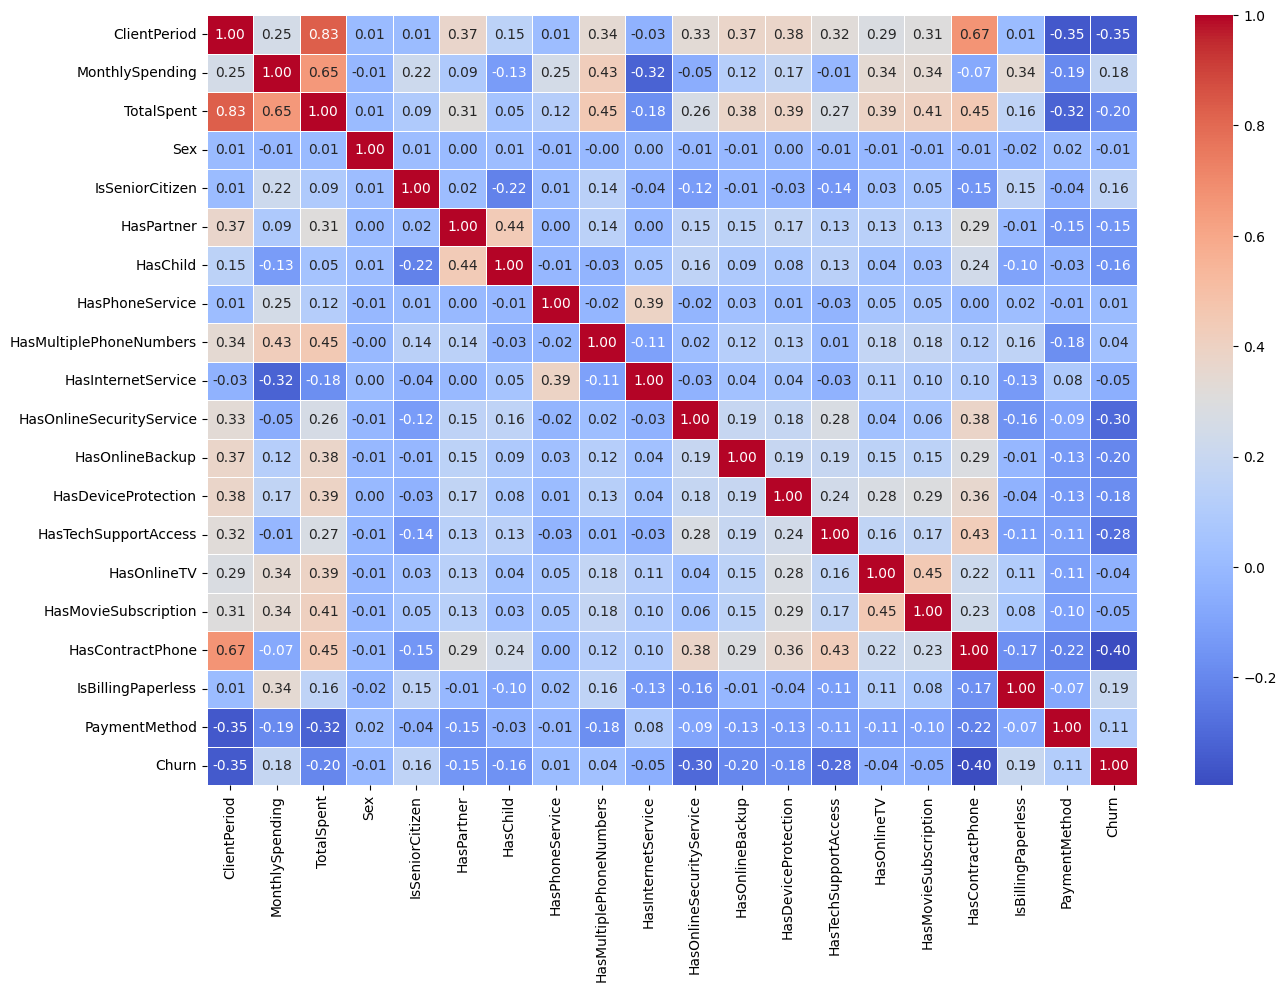

In [74]:
corr_matrix = train_label_encoded.corr()
fig, axes = plt.subplots(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm", ax=axes, linewidth=.5, fmt=".2f")


Как мы видим, TotalSpent зависима от ClientPeriod и MonthlySpending, в меньшей степени от HasContractPhone

Теперь, посмотрим распределение целевого признака 

<Axes: >

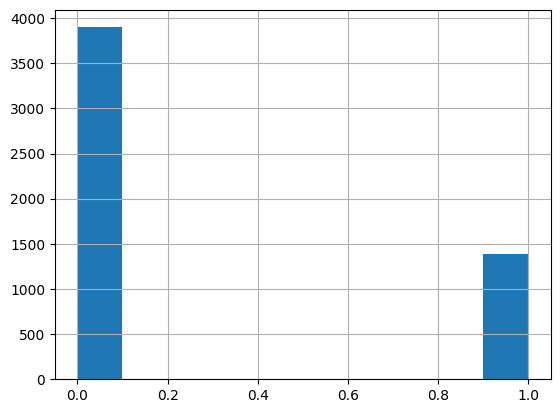

In [75]:
train[churn].hist()

Как мы видим, тут есть дисбаланс классов. Мы его исправим далее

# Подготовка данных для обучения

### Подготовка классов для пайплайнов

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import Pipeline as Pipeline_imb # чтоб встроить синтетические данные в пайплайн

from imblearn.over_sampling import SMOTE

#пайп для категориальных признаков
categorical_pipe = Pipeline(steps=[('ohe', OneHotEncoder(drop="first", handle_unknown="error"))])

#пайп для численных признаков
numeric_pipe = Pipeline(steps=[('scaler', StandardScaler())])

#трансформер колонок
columns_transformer = ColumnTransformer(
    transformers=[
        ("categorical", categorical_pipe, cat_cols),
        ("numeric", numeric_pipe, num_cols),
    ])

#пайп для генерации синтетических данных
smote_pipe = SMOTE(random_state=42)

### Подготовим алгоритмы для нахождения лучших гиперпараметров

In [77]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import optuna

from sklearn.metrics import roc_auc_score

### Разделим обучающую выборку на обучающую и контрольную

In [78]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(train.drop(columns=churn), train[churn], test_size=0.2, shuffle=False)
train_x

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,70,80.70,5617.95,Female,No,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Electronic check
4221,5,90.35,434.50,Male,No,Yes,Yes,Yes,No,Fiber optic,Yes,No,Yes,No,No,Yes,Month-to-month,Yes,Mailed check
4222,17,54.60,934.80,Male,No,Yes,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Electronic check
4223,19,39.65,733.35,Male,No,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check


# Обучение моделей
Обучать будем catboost, xgboost, logisticregression так как они показали наилучший результат в ноутбуке classif. Реализацию других моделей можно будет посмотреть там

### Логистическая регрессия

##### Обучение логистической регрессии

In [79]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from imblearn.pipeline import Pipeline as Pipeline_imb


# lr_pipe = Pipeline_imb([
#     ('preproc', columns_transformer),
#     ('smote', smote_pipe),
#     ('model', LogisticRegression())
# ])

# # пространство гиперпараметров
# lr_params_grid = {
#     "model__C": [i/10 for i in range(1, 20)],
#     "model__penalty": ["l2"],
#     "model__solver": ["saga"],
#     "model__max_iter": [i for i in range(100, 1000, 100)]
# }

# lr_grid_search = GridSearchCV(
#     estimator=lr_pipe,
#     param_grid=lr_params_grid,
#     scoring="roc_auc",
#     n_jobs=-1,
#     cv=5,
#     refit=True
# )

# lr_model = lr_grid_search.fit(train_x, train_y)
# print("Лучшие параметры:", lr_grid_search.best_params_)


In [80]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as Pipeline_imb


lr_pipe = Pipeline_imb([
    ('preproc', columns_transformer),
    ('smote', smote_pipe),
    ('model', LogisticRegression(C=0.1, max_iter=400, penalty='l2', solver='saga'))
])

lr_model = lr_pipe.fit(train_x, train_y)


In [81]:
roc_auc_score(test_y, lr_model.predict(test_x))


0.7585052181773358

Как мы видим, при наборе параметров {'model__C': 0.1, 'model__max_iter': 400, 'model__penalty': 'l2', 'model__solver': 'saga'}

Результат 0.758

##### Матрица ошибок

In [82]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(50.722222222222214, 0.5, 'true values')

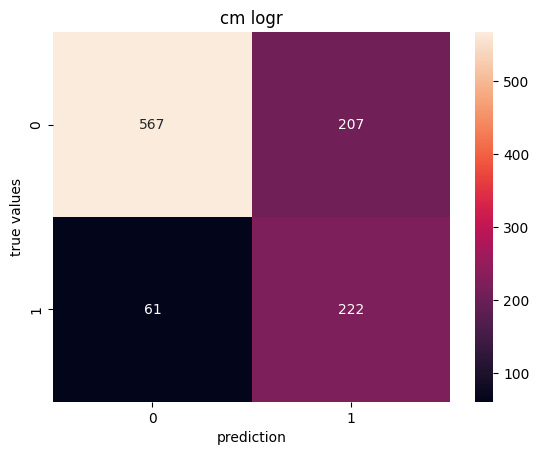

In [83]:
cm_lr = confusion_matrix(test_y ,lr_model.predict(test_x))
sns.heatmap(cm_lr, annot=True, fmt='d')
plt.title("cm logr")
plt.xlabel('prediction')
plt.ylabel('true values')

### CatBoost

##### Обучение catboost(использую random search)

In [84]:
# from catboost import CatBoostClassifier

# cat_features = train_x.select_dtypes(include=["object", "category"]).columns.tolist()

# cb_params_grid = {"depth": [i for i in range(2, 5)], 
#                         "l2_leaf_reg": [i/10 for i in range(1, 11, 2)], 
#                         "subsample": [i/10 for i in range(1, 11, 2)], 
#                         "n_estimators": [i for i in range(1, 500, 200)], 
#                         "learning_rate": [i/100 for i in range(1, 100, 20)], 
#                         'class_weights': [[1, i/10] for i in range(10, 30, 5)]  
#                        }

# cb_model = CatBoostClassifier(
#     cat_features=cat_features,
#     logging_level="Silent",
#     random_seed=42,
#     early_stopping_rounds=30,
#     eval_metric="AUC:hints=skip_train~false",
#     grow_policy="Lossguide"
#     )

# cb_model.grid_search(cb_params_grid, train_x, train_y, cv=3, plot=True, refit=True, verbose=True)

# # cb_pipe = Pipeline_imb([
# #     ('preproc', columns_transformer),
# #     ('smote', smote_pipe),
# #     ('model', cb_model)
# # ])

# # cb_rand_search = RandomizedSearchCV(
# #     estimator=cb_pipe,
# #     param_distributions=cb_params_rand,
# #     n_iter=30,
# #     scoring='roc_auc',
# #     cv=5,
# #     n_jobs=-1,
# #     random_state=42,
# #     refit=True
# # )


# # cb_model = cb_rand_search.fit(train_x, train_y)
# # print("Лучшие параметры:", cb_rand_search.best_params_)

# print(f"  Лучший результат: {cb_model.best_score_['learn']}")
# print(f"  Лучший набор гиперпараметров: {cb_model.get_params()}")

In [86]:
import optuna
from optuna.integration import catboost as ocb
from catboost import CatBoostClassifier

def objective(trial):
    lr = trial.suggest_float('lr', 0.01, 1)
    itr = trial.suggest_int('itr', 1, 800)
    dpt = trial.suggest_int('dpt', 2, 10)
    
    cb_model = CatBoostClassifier(iterations=itr, learning_rate=lr, verbose=False, depth=dpt,
                            eval_metric = 'AUC', early_stopping_rounds=30, thread_count=6)

    cb_pipe = Pipeline_imb([
    ('preproc', columns_transformer),
    ('smote', smote_pipe),
    ('model', cb_model)
    ])
    
    cb_model = cb_pipe.fit(train_x, train_y)
    
    return roc_auc_score(test_y, cb_model.predict(test_x))

study = optuna.create_study(direction="maximize", pruner="Hyperband")
study.optimize(objective, n_trials=200)

print("Лучший ROC-AUC:", study.best_value)
print("Лучшие параметры:", study.best_params)

[I 2025-07-12 12:14:05,951] A new study created in memory with name: no-name-74418e50-a015-4be9-8c51-5425cac54ba4
[I 2025-07-12 12:14:11,556] Trial 0 finished with value: 0.690860656860328 and parameters: {'lr': 0.46228065455483036, 'itr': 140, 'dpt': 10}. Best is trial 0 with value: 0.690860656860328.
[I 2025-07-12 12:14:13,089] Trial 1 finished with value: 0.7350690735110161 and parameters: {'lr': 0.04528743944543321, 'itr': 421, 'dpt': 4}. Best is trial 1 with value: 0.7350690735110161.
[I 2025-07-12 12:14:13,363] Trial 2 finished with value: 0.7688251568192401 and parameters: {'lr': 0.3541505064552153, 'itr': 8, 'dpt': 7}. Best is trial 2 with value: 0.7688251568192401.
[I 2025-07-12 12:14:14,677] Trial 3 finished with value: 0.7261027565489724 and parameters: {'lr': 0.652189506220069, 'itr': 479, 'dpt': 2}. Best is trial 2 with value: 0.7688251568192401.
[I 2025-07-12 12:14:15,385] Trial 4 finished with value: 0.7281731357456561 and parameters: {'lr': 0.3084562648801566, 'itr': 16

Лучший ROC-AUC: 0.7716351202052575
Лучшие параметры: {'lr': 0.23800411398145677, 'itr': 6, 'dpt': 9}


In [91]:
from catboost import CatBoostClassifier

# cat_features = train_x.select_dtypes(include=["object", "category"]).columns.tolist()

cb_model = CatBoostClassifier(
    logging_level="Silent",
    iterations=6,
    depth=9,
    learning_rate=0.238,
    )


cb_pipe = Pipeline_imb([
    ('preproc', columns_transformer),
    ('smote', smote_pipe),
    ('model', cb_model)
])

cb_model = cb_pipe.fit(train_x, train_y)

In [92]:
roc_auc_score(test_y, cb_model.predict(test_x))

0.7716351202052575

Как мы видим, при наборе параметров {'lr': 0.23800411398145677, 'itr': 6, 'dpt': 9}

Результат 0.771

##### Матрица ошибок

Text(50.722222222222214, 0.5, 'true values')

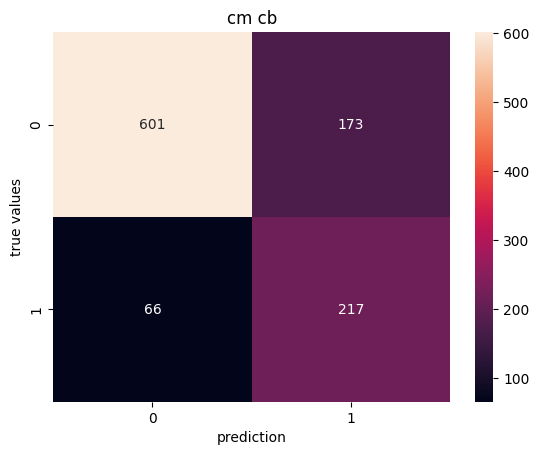

In [93]:
cm_cb = confusion_matrix(test_y ,cb_model.predict(test_x))
sns.heatmap(cm_cb, annot=True, fmt='d')
plt.title("cm cb")
plt.xlabel('prediction')
plt.ylabel('true values')

### XGBoost

Обучение XGBoost(используем optuna)

In [ ]:
# import optuna
# from optuna.integration import xgboost as xgb
# from xgboost import XGBClassifier

# def objective(trial):
#     eta = trial.suggest_float('eta', 0.01, 1)
#     dpt = trial.suggest_int('dpt', 2, 5)
#     max_cat = trial.suggest_int('mcat', 1, 5)
#     n_est = trial.suggest_int('nest', 50, 400)
#     max_lvs = trial.suggest_int('mlvs', 1, 7)
#     #max_cat_threshold


#     # n_estimators : Optional[int]
#     #     Number of boosting rounds.

#     # max_depth :  typing.Optional[int]

#     #     Maximum tree depth for base learners.

#     # max_leaves : typing.Optional[int]

#     #     Maximum number of leaves; 0 indicates no limit.

#     # max_bin : typing.Optional[int]

#     #     If using histogram-based algorithm, maximum number of bins per feature


#     xgb = XGBClassifier(n_jobs=-1, eta=eta, n_estimators=n_est, max_leaves=max_lvs,
#                              max_cat_threshold=max_cat, max_depth=dpt)
#     xgb_pipe = Pipeline_imb([
#     ('preproc', columns_transformer),
#     ('smote', smote_pipe),
#     ('model', xgb)
#     ])
    
    
#     xgb_model = xgb_pipe.fit(train_x, train_y)
#     return roc_auc_score(test_y, xgb_model.predict(test_x))
    
# #     cb = CatBoostClassifier(iterations=itr, learning_rate=lr, verbose=False, class_weights=[1, w1], depth=dpt,
# #                             eval_metric = 'AUC', early_stopping_rounds=30, thread_count=6)
    
# #     cb.fit(train_x_cb, train_y_cb, cat_features=cat_features)
    
# #     return roc_auc_score(test_y, cb.predict(test_x_cb))

# study = optuna.create_study(direction="maximize", pruner="Hyperband")
# study.optimize(objective, n_trials=2000)

# print("Лучший ROC-AUC:", study.best_value)
# print("Лучшие параметры:", study.best_params)


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1, eta=0.029, n_estimators=198, max_leaves=3,
                    max_cat_threshold=4, max_depth=3)

xgb_pipe = Pipeline_imb([
    ('preproc', columns_transformer),
    ('smote', smote_pipe),
    ('model', xgb)
    ])
    
    
xgb_model = xgb_pipe.fit(train_x, train_y)




In [ ]:
roc_auc_score(test_y, xgb_model.predict(test_x))

Как мы видим, при наборе параметров {'eta': 0.029351874165375543, 'dpt': 3, 'mcat': 4, 'nest': 198, 'mlvs': 3}

Результат 0.7710439093872408

### Матрица ошибок

In [ ]:
cm_xgb = confusion_matrix(test_y ,xgb_model.predict(test_x))
sns.heatmap(cm_xgb, annot=True, fmt='d')
plt.title("cm xgb")
plt.xlabel('prediction')
plt.ylabel('true values')

# Обработка результатов для отправки

### Линейная регрессия

In [ ]:
lr_commit_predict = lr_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':lr_commit_predict})
submission.to_csv('submission_logr.csv', index=False)

### CatBoost

In [ ]:

cb_commit_predict = cb_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':cb_commit_predict})
submission.to_csv('submission_cb.csv', index=False)

### XGBoost

In [ ]:
xgb_commit_predict = xgb_model.predict(commit)

submission = pd.DataFrame({"Id": commit.index,
                          'Churn':xgb_commit_predict})
submission.to_csv('submission_xgb.csv', index=False)